In [1]:
import numpy

In [2]:
def Sigmoid(x):
    return 1.0 / (1.0 + numpy.exp(-1 * numpy.array(x)))

In [3]:
Sigmoid([-1, 0, 1])

array([0.26894142, 0.5       , 0.73105858])

In [4]:
def BackpropXOR(W1, W2, X, D):
    alpha = 0.9
    N = 4
    for k in range(N):
        x = X[k]
        d = D[k]
        v1 = numpy.dot(W1, x)
        y1 = Sigmoid(v1)
        v = numpy.dot(W2, y1)
        y = Sigmoid(v)
        
        e = d - y
        delta = y*(1-y)*e
        e1 = numpy.dot(W2.T, delta)
        delta1 = y1*(1-y1)*e1
        
        dW1 = alpha*numpy.outer(delta1, numpy.transpose(x))
        W1 = W1 + dW1
        
        dW2 = alpha*delta*numpy.transpose(y1)
        W2 = W2 + dW2
        
    return W1, W2

In [5]:
X = numpy.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
D = numpy.array([0, 1, 1, 0])

In [6]:
W1 = 2*numpy.random.rand(4, 3)-1
W2 = 2*numpy.random.rand(1, 4)-1

In [7]:
for epoch in range(10000):
    W1, W2 = BackpropXOR(W1, W2, X, D)

In [8]:
y = numpy.zeros((4))

In [9]:
N = 4
for k in range(N):
    x = X[k]
    v1 = numpy.dot(W1, x)
    y1 = Sigmoid(v1)
    v = numpy.dot(W2, y1)
    y[k] = Sigmoid(v)

In [10]:
y

array([0.00888623, 0.99326592, 0.9858945 , 0.01240395])

In [11]:
def BackpropMnt(W1, W2, X, D):
    alpha = 0.9
    beta = 0.9
    
    mnt1 = numpy.zeros(W1.shape)
    mnt2 = numpy.zeros(W2.shape)
    
    N = 4
    for k in range(N):
        x = X[k]
        d = D[k]
        v1 = numpy.dot(W1, x)
        y1 = Sigmoid(v1)
        v = numpy.dot(W2, y1)
        y = Sigmoid(v)
        
        e = d - y
        delta = y*(1-y)*e
        e1 = numpy.dot(W2.T, delta)
        delta1 = y1*(1-y1)*e1
        
        dW1 = alpha*numpy.outer(delta1, numpy.transpose(x))
        mnt1 = dW1 + beta*mnt1
        W1 = W1 + mnt1
        
        dW2 = alpha*delta*numpy.transpose(y1)
        mnt2 = dW2 + beta*mnt2
        W2 = W2 + mnt2
        
    return W1, W2

In [12]:
X = numpy.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
D = numpy.array([0, 1, 1, 0])

W1 = 2*numpy.random.rand(4, 3)-1
W2 = 2*numpy.random.rand(1, 4)-1

for epoch in range(10000):
    W1, W2 = BackpropMnt(W1, W2, X, D)
    
y = numpy.zeros((4))

N = 4
for k in range(N):
    x = X[k]
    v1 = numpy.dot(W1, x)
    y1 = Sigmoid(v1)
    v = numpy.dot(W2, y1)
    y[k] = Sigmoid(v)
    
y

array([0.00426905, 0.99445825, 0.99357961, 0.00981339])

In [13]:
def BackpropCE(W1, W2, X, D):
    alpha = 0.9
    
    N = 4
    for k in range(N):
        x = X[k]
        d = D[k]
        v1 = numpy.dot(W1, x)
        y1 = Sigmoid(v1)
        v = numpy.dot(W2, y1)
        y = Sigmoid(v)
        
        e = d - y
        delta = e
        e1 = numpy.dot(W2.T, delta)
        delta1 = y1*(1-y1)*e1
        
        dW1 = alpha*numpy.outer(delta1, numpy.transpose(x))
        W1 = W1 + dW1
        
        dW2 = alpha*delta*numpy.transpose(y1)
        W2 = W2 + dW2
        
    return W1, W2

In [14]:
X = numpy.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
D = numpy.array([0, 1, 1, 0])

W1 = 2*numpy.random.rand(4, 3)-1
W2 = 2*numpy.random.rand(1, 4)-1

for epoch in range(10000):
    W1, W2 = BackpropCE(W1, W2, X, D)
    
y = numpy.zeros((4))

N = 4
for k in range(N):
    x = X[k]
    v1 = numpy.dot(W1, x)
    y1 = Sigmoid(v1)
    v = numpy.dot(W2, y1)
    y[k] = Sigmoid(v)
    
y

array([2.62182512e-05, 9.99737385e-01, 9.99908691e-01, 4.37553012e-04])

In [15]:
X = numpy.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
D = numpy.array([0, 1, 1, 0])

E1 = numpy.zeros((1000))
E2 = numpy.zeros((1000))

W11 = 2*numpy.random.rand(4, 3)-1
W12 = 2*numpy.random.rand(1, 4)-1
W21 = W11
W22 = W12

In [16]:
for epoch in range(1000):
    W11, W12 = BackpropCE(W11, W12, X, D)
    W21, W22 = BackpropXOR(W21, W22, X, D)
    
    es1 = 0.0
    es2 = 0.0
    N = 4
    
    for k in range(4):
        x = X[k]
        d = D[k]
        
        v1 = numpy.dot(W11, x)
        y1 = Sigmoid(v1)
        v = numpy.dot(W12, y1)
        y = Sigmoid(v)
        es1 = es1 + numpy.power((d-y), 2)
        
        v2 = numpy.dot(W21, x)
        y2 = Sigmoid(v2)
        v = numpy.dot(W22, y2)
        y = Sigmoid(v)
        es2 = es2 + numpy.power((d-y), 2)
        
    E1[epoch] = es1 / N
    E2[epoch] = es2 / N

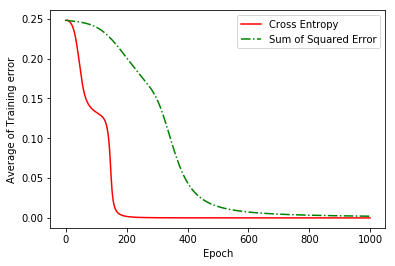

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(range(1000), E1, 'r-', label='Cross Entropy')
plt.plot(range(1000), E2, 'g-.', label='Sum of Squared Error')
plt.xlabel("Epoch")
plt.ylabel("Average of Training error")
plt.legend()
plt.show()